<a href="https://colab.research.google.com/github/ikerarana/Machine-Learning-Notebooks/blob/master/1_RegresionLineal_EagerAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1- Importamos las librerias que vamos a usar en el proyecto**

In [0]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn import preprocessing

**2- Indicamos que vamos a trabajar en modo EAGER**


EAGER, es el modo de ejecutar las operaciones secuencialmente, como en cualquier otro entorno de programacion, es decir, sin grafos.


In [0]:
tf.enable_eager_execution()
tfe = tf.contrib.eager
print("Modo Eager API seleccionado con exito")

Modo Eager API seleccionado con exito


**3- Datos del modelo**

Usamos los datos del modelo de Boston Dataset que trae la libreria Scikit-Learn. En estos datos, se presentan las diferentes variables que afectan en el precio de la vivienda de las casas de Bostos, por ejemplo:


*   Distancia a la parada de metro mas cercana
*   Habitaciones por vivienda
*   Ratio de criminalidad del barrio
*   ...

En este caso haremos un modelo bidimensional, por lo que cogeremos solo 2 variables: El numero de habitaciones por vivienda, y el precio final de estas



In [0]:
# datos del dataset
boston = datasets.load_boston()

# recogemos la variable de la columna 5, numero medio de habitaciones por vivienda
X = boston.data[:,5]

# recogemos la variable a predecir
Y= boston.target

# las convertimos a array de numpy
entrenamiento_X = np.asarray(X)
entrenamiento_Y = np.asarray(Y)

# escalamos las variables
entrenamiento_X = preprocessing.scale(entrenamiento_X)
entrenamiento_Y = preprocessing.scale(entrenamiento_Y)

# sacamos el numero de muestras de la variable X
numMuestras = len(entrenamiento_X)


**4- Creamos los parametros constantes del modelo**

El ratio de aprendizaje se corresponde con el tamaño de los pasos que dara el descenso del gradiente en cada iteracion.

In [0]:
# Parametros
ratioAprendizaje = 0.01
muestrasParaPintar = 100
iteraciones = 1000

**5- Ajuste del modelo**

Para ajustar el modelo usaremos la ecuacion de la recta, dado que nuestro modelo es bidimensional:
$$y=wx+b$$

En caso de ser multidimensional, tendriamos que extrapolar esa ecuacion a n dimensiones:
$$y= b+w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n}$$

In [0]:
# Inicializamos aleatoriamente las variables Weight y Bias, que hacen referencia a los parametros de la ecuacion de la recta
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# definimos la funcion regresion lineal
def regresion_lineal(x):
    return x * W + b



**6- Definimos la funcion de coste que usaremos en el modelo, en este caso, usaremos el Error Cuadratico Medio (ECM)**

En nuestro modelo, necesitamos una funcion de coste: $$J(\theta)$$
La intuicion del modelo, es minimizar la funcion de coste de la siguiente manera:
$$\min_{\theta} J(\theta)$$
En este caso, la funcion que usaremos, sera la funcion ECM que se define de la siguiente forma:

$$ECM=\frac{1}{2n}\sum_{i=1}^N( f_{\theta} (x_i)- y_i)^2$$

Donde la funcion es el valor que se ha predicho de la variable  "y"
$$f_{\theta} (x_i)=\hat{y_{i}}$$


Lo que hacemos con esta funcion es mirar la diferencia entre el valor que se ha predecido y el valor que tiene la variable de salida real. Este resultado se eleva al cuadrado para penalizar mas los errores mas grandes. Finalmente hacemos la media, sumandolos todos y dividiendo entre el numero de muestras

Por lo tanto, lo que estamos buscando es minimizar la funcion de coste J, que se define como:

$$\min_{\theta_{0}\theta_{1}} \frac{1}{2n}\sum_{i=1}^N( f_{\theta} (x_i)- y_i)^2 $$

$$J(\theta_{0}\theta_{1})=\frac{1}{2n}\sum_{i=1}^N( f_{\theta} (x_i)- y_i)^2$$

$$\min_{\theta_{0}\theta_{1}}J(\theta_{0}\theta_{1})$$

In [0]:
# Error cuadratico medio
def error_cuadratico_medio(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * numMuestras)

**7- Implementamos el Descenso del Gradiente**

El descenso del gradiente, se define como la funcion:

$$\theta_{j} := \theta_{j-1}-\alpha\frac{\partial J(\theta_{0}\theta_{1})}{\partial \theta_{j}}$$

Donde en funcion al valor de alpha (ratio de aprendizaje), vamos actualizando el valor de los parametros theta en cada iteracion. Lo que hacemos es calcular la derivada, le ponemos simbolo negativo, para que en vez de un ascenso sea un descenso. Lo multiplicamos por el valor que tiene alpha, para que el salto sea mas grande o mas pequeño, y finalmente se lo restamos al valor de theta. De forma que la nueva theta, va a ser, la antigua theta, menos el valor de la derivada. Convergiendo asi en un punto.


In [0]:
# optimizador
optimizer = tf.train.GradientDescentOptimizer(learning_rate=ratioAprendizaje)

# calculamos el gradiente en base a la funcion de coste
grad = tfe.implicit_gradients(error_cuadratico_medio)



**8- Ajustamos la linea a los datos**

Initial cost= 0.957091868 W= 0.12386669 b= -1.0349418
Iteracion: 0001 Valor de la funcion de coste= 0.943184674 W= 0.12958163 b= -1.0245924
Iteracion: 0100 Valor de la funcion de coste= 0.351869524 W= 0.486175 b= -0.3788221
Iteracion: 0200 Valor de la funcion de coste= 0.270782083 W= 0.6187916 b= -0.13866113
Iteracion: 0300 Valor de la funcion de coste= 0.259918004 W= 0.6673334 b= -0.050754476
Iteracion: 0400 Valor de la funcion de coste= 0.258462489 W= 0.68510133 b= -0.018577771
Iteracion: 0500 Valor de la funcion de coste= 0.258267432 W= 0.69160503 b= -0.0068000676
Iteracion: 0600 Valor de la funcion de coste= 0.258241326 W= 0.69398546 b= -0.0024890439
Iteracion: 0700 Valor de la funcion de coste= 0.258237779 W= 0.6948567 b= -0.00091107056
Iteracion: 0800 Valor de la funcion de coste= 0.258237332 W= 0.69517577 b= -0.0003334815
Iteracion: 0900 Valor de la funcion de coste= 0.258237273 W= 0.6952926 b= -0.00012206397
Iteracion: 1000 Valor de la funcion de coste= 0.258237243 W= 0.6953352

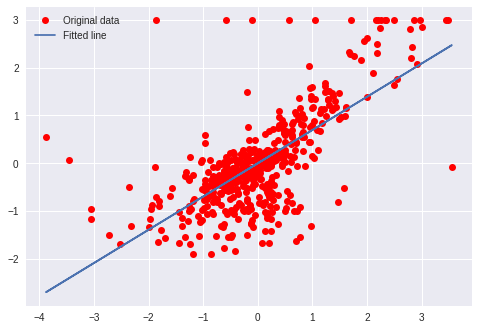

In [0]:
# Coste inicial de la funcion de coste
print("Coste inicial= {:.9f}".format(
    error_cuadratico_medio(regresion_lineal, entrenamiento_X, entrenamiento_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Iteramos para ajustar la linea
for step in range(iteraciones):
    
    
    optimizer.apply_gradients(grad(regresion_lineal, entrenamiento_X, entrenamiento_Y))

    if (step + 1) % muestrasParaPintar == 0 or step == 0:
        print("Iteracion:", '%04d' % (step + 1), "Valor de la funcion de coste=",
              "{:.9f}".format(error_cuadratico_medio(regresion_lineal, entrenamiento_X, entrenamiento_Y)),
              "W=", W.numpy(), "b=", b.numpy())

# Graphic display
plt.plot(entrenamiento_X, entrenamiento_Y, 'ro', label='Original data')
plt.plot(entrenamiento_X, np.array(W * entrenamiento_X + b), label='Fitted line')
plt.legend()
plt.show()